# Workshop 2
This workshop was realized by:
- David Plazas Escudero
- Andrés Felipe Tamayo
- Juan Sebastián Cárdenas Rodríguez

## Packages and Global Behavior

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sc
import scipy.stats as st
import statsmodels.api as sm

from PIL import Image
from sklearn.covariance import ledoit_wolf, oas

# Settings
%matplotlib inline
matplotlib.rc('text', usetex=True)
plt.rc('text.latex', preamble=r'\usepackage{mathtools}')
matplotlib.rcParams["figure.facecolor"] = "white"
matplotlib.rcParams["axes.facecolor"] = "white"
matplotlib.rcParams["savefig.facecolor"] = "white"

# Global variables
save_fig = lambda x : plt.savefig("figs/" + x, bbox_inches='tight')

# Aesthetic
end = '\033[0m'
bold = '\033[1m'
header = "===================================="
n_spaces = 3

def print_results(dictionary):
    max_length = max(map(lambda x: len(x.replace("\n", "")), dictionary))
    for key in dictionary:
        if key[-1] == "\n":
            print(bold + str(key) + end + str(dictionary[key]))
        else:
            spaces_aux = n_spaces + (max_length - len(key.replace("\n", "")))
            spaces = " " * spaces_aux
            print(bold + str(key) + end + spaces + str(dictionary[key]))

## Exercise 1
For this cell, the four eigen values of the matrix $C = A^TA$ are plotted for a number `num_of_matrix` of simulated matrices. Furthermore, this matrix generation was done by a uniform distribution with `low=-2` and `high=2`.

It is important to notice that for all the simulated matrices, it was found that $C$ has positive eigen values.

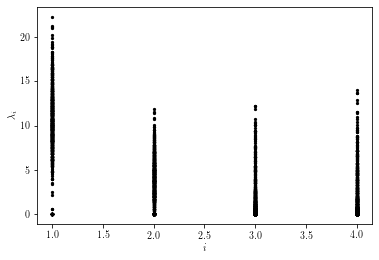

In [2]:
m = 3
n = 4
num_of_matrix = 1000

xs = np.linspace(1, n, n)
for i in range(num_of_matrix):
    A = np.random.uniform(low=-2, high=2, size=(m, n))
    vals = np.linalg.eigvals(A.T.dot(A))
    plt.scatter(xs, vals, s=5, c='k')
plt.ylabel("$\lambda_i$")
plt.xlabel("$i$")
plt.show()

## Exercise 2
In the next cell, a matrix $A$ is simulated as the previous exercise. Then, the required properties for the matrices $B=A^TA$ and $B_1 = AA^T$ are displayed.

In [3]:
# Simulated matrix
A = np.random.uniform(low=-2, high=2, size=(m, n))
print(header)
print(bold + "A =\n" + end, str(A) + "\n")

# Matrix multiplication
B = A.T @ A
B1 = A @ A.T

# Eigen values and vectors
values, vectors = np.linalg.eig(B)
values1, vectors1 = np.linalg.eig(B1)

# Result printing
print(header + "\n               Properties:")
results = {"Trace B =": np.trace(B),
           "Trace B1 =": np.trace(B1),
           "\nDeterminant B =": np.linalg.det(B),
           "Determinant B1 =": np.linalg.det(B1),
           "\nEigen Values B =": values,
           "Eigen vectors B =\n": vectors,
           "\nEigen Values B1 =": values1,
           "Eigen vectors B1 =\n": vectors1}

print_results(results)

A =
 [[-1.94902494  0.92647233 -0.87829165  0.04699977]
 [-1.38604589 -0.36406115 -1.34708626 -0.06828731]
 [ 0.87971008 -0.23380296  0.61047018  1.48688002]]

               Properties:
Trace B =            12.715662362074488
Trace B1 =           12.715662362074488

Determinant B =      2.039024008227631e-15
Determinant B1 =     18.618118062171895

Eigen Values B =     [ 9.83378927e+00 -1.67998248e-15  1.86874254e+00  1.01313055e+00]
Eigen vectors B =
[[ 0.80673882 -0.54040179  0.20432848  0.12404941]
 [-0.17282284 -0.48233039 -0.07387123 -0.8555891 ]
 [ 0.52413055  0.68834813  0.05381026 -0.49856641]
 [ 0.21116797 -0.03873169 -0.97462678  0.06332912]]

Eigen Values B1 =    [9.83378927 1.01313055 1.86874254]
Eigen vectors B1 =
[[-0.69609781 -0.58973272  0.40946693]
 [-0.56626018  0.80159047  0.19183883]
 [ 0.44135842  0.09832622  0.89192752]]


## Exercise 4
The function `exercise_4` plots the difference of the estimation of the covariance using the usual formula and the one done by the `ledoit_wolf` function. It saves the figure in the given directory and recieves in the `ord_val` parameter the norm used to calculate the distance between the matrices.

This exercise was tested with a small dataset, of `size=10`. This was done in order to see which method behaves better when given a small dataset. This can be changed by adding the optional parameter in each call. It is important to see that when the dataset starts getting bigger, the difference between the two methods is negligible.

In [4]:
def exercise_4(ord_val, fig_name, ord_tex=None, method=0, size=10):
    if ord_tex is None:
        ord_tex = ord_val
    ns = np.linspace(2, 100, 99, dtype='int')
    dist = np.zeros((2, ns.size))
    for n in ns:
        A_n = np.random.uniform(low=-2, high=2, size=(10, n))
        C_n = A_n.T @ A_n
        means = np.ones(n)*n
        data = np.random.multivariate_normal(means, C_n, size=size)

        cov = np.cov(data.T)
        dist[0, n - 2] = np.linalg.norm(cov - C_n, ord=ord_val)

        cov, _ = ledoit_wolf(data)
        dist[1, n - 2] = np.linalg.norm(cov - C_n, ord=ord_val)
    plt.plot(ns, dist[0, :], 'k', label='Standard')
    plt.plot(ns, dist[1, :], 'r', label='LW')
    plt.xlabel('$n$')
    plt.ylabel('$\lVert C_n - \hat{C}_n \lVert_{' + str(ord_tex) + '}$')
    plt.legend()
    save_fig(fig_name)
    plt.show()


### Frobenius Norm

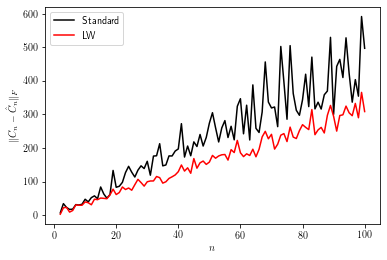

In [5]:
exercise_4('fro', "exercise-4-fro.pdf", "F")

### Infinity Norm

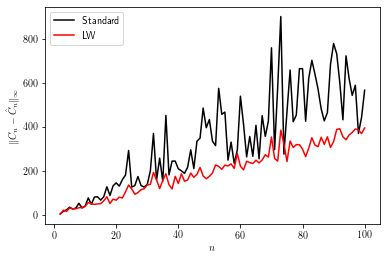

In [6]:
exercise_4(np.inf, "exercise-4-inf.pdf", "\infty")

### Norm 2

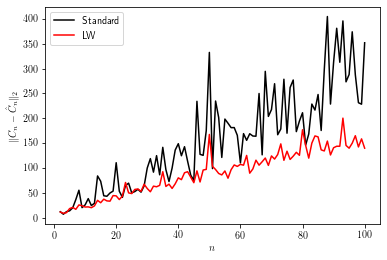

In [7]:
exercise_4(2, "exercise-4-norm2.pdf")

### Norm 1

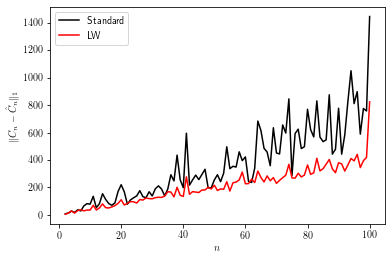

In [8]:
exercise_4(1, "exercise-4-norm1.pdf")

## Exercise 5
The function `exercise_5` simulates different matrices of size $2 \times 2$ and calculates the norm of the matrix. Then, it applies the following orthonormal transformation
$$
     A\Theta = A\begin{bmatrix}
                  \cos(\theta) & -\sin(\theta) \\
                  \sin(\theta) & \cos(\theta)
                \end{bmatrix}
$$

for a given parameter $\theta=\frac{\pi}{3}$. Then, it calculates the norm for this transformed matrix and plots both norms. If the norm is invariant to orthonormal transformations, it should be seen a line similar to $y=x$ therefore preserving the norm of the original matrix.

In [9]:
def exercise_5(ord_val, fig_name, ord_tex=None, theta=np.pi/3, n_max=100):
    if ord_tex is None:
        ord_tex = ord_val
    ns = np.array(range(2, n_max))
    trans = np.array([[np.cos(theta), -np.sin(theta)],
                      [np.sin(theta), np.cos(theta)]])
    norms = np.zeros((2, n_max - 2))
    for n in ns:
        A = np.random.uniform(low=-2, high=2, size=(2, 2))
        norms[0, n - 2] = np.linalg.norm(A, ord=ord_val)
        norms[1, n - 2] = np.linalg.norm(A @ trans, ord=ord_val)

    plt.scatter(norms[0, :], norms[1, :], s=5, c='k')
    plt.xlabel("$\lVert A \lVert_{" + str(ord_tex) + "}$")
    plt.ylabel("$\lVert A\Theta \lVert_{" + str(ord_tex) + "}$")
    save_fig(fig_name)
    plt.show()

### Frobenius
Invariant.

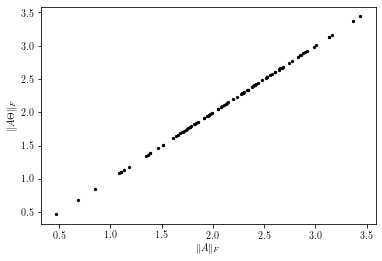

In [10]:
exercise_5('fro', "exercise-5-fro.pdf", ord_tex="F")

### Infinity norm
Not invariant.

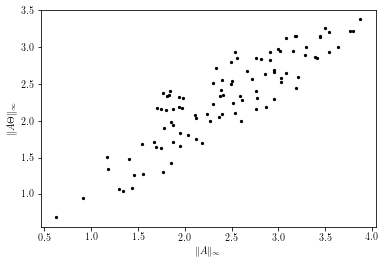

In [11]:
exercise_5(np.inf, "exercise-5-inf.pdf", ord_tex="\infty")

### Norm 2
Invariant.

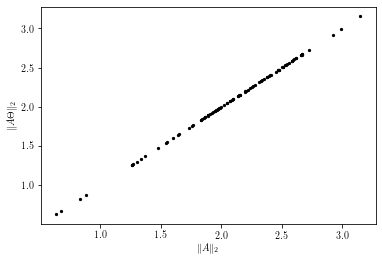

In [12]:
exercise_5(2, "exercise-5-norm2.pdf")

### Norm 1
Not invariant.

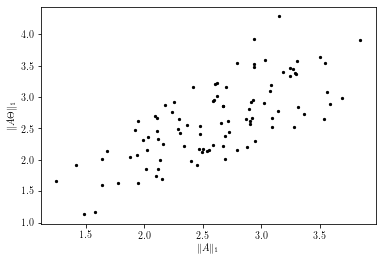

In [13]:
exercise_5(1, "exercise-5-norm1.pdf")

## Exercise 7
The function `exercise_7` recieves the singular value decomposition of the form $A = USV^H$, the maximum singular value to represent the matrix given by `n_lambda` and returns the matrices up to the maximum value. If the optional parameter `r_all` is set to false, only the last matrix calculated is returned.

In [14]:
def exercise_7(u, s, vh, n_lambda, r_all=True):
    if r_all:
        matrices = []
    acum = np.zeros((u.shape[0], vh.shape[1]))
    for i in range(n_lambda):
        u_aux = np.reshape(u[:, i], (u.shape[0], 1))
        v_aux = np.reshape(vh[i, :], (1, vh.shape[0]))
        acum += u_aux.dot(v_aux) * s[i]
        if r_all:
            matrices.append(acum.copy())

    if r_all:
        return matrices
    else:
        return acum

In the next cell, a photo is used to represent the first 4 representations given by the biggest four eigen values. It is clearly seen that when more eigen values are used, the photo starts to reconstruct itself and sequentially it becomes clearer.

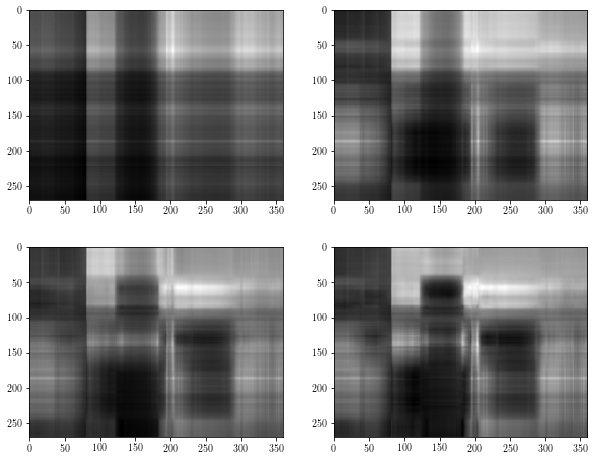

In [15]:
picture = np.array(Image.open("photo.jpg").convert("L"))
u, s, vh = np.linalg.svd(picture)
_, axs = plt.subplots(2, 2, figsize=(10, 8))

# Plotting the first 4 images
images = exercise_7(u, s, vh, 4)
elems = [(0, 0), (0, 1), (1, 0), (1, 1)]
i = 0
for elem in elems:
    axs[elem].imshow(images[i], cmap='gray')
    i += 1
plt.show()

In the next cell, only the image using up to `n_lambda` biggest eigen values are shown. Hence, an optimal cut for the pictures is given by `n_lambda=20` as it is clearly seen that the image is composed by two individuals and the background is more distinguished.

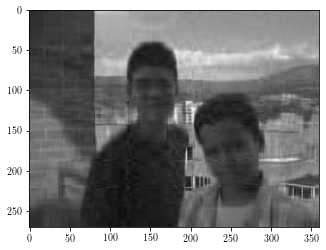

In [16]:
n_lambda = 20
image = exercise_7(u, s, vh, n_lambda, r_all=False)
plt.imshow(image, cmap='gray')
plt.show()

## Exercise 11
In the next cell, each of the $X_i$ is simulated and the output $y$ is created.

In [17]:
# Simulating X_i
xs = []
aux = np.zeros(1000)
for i in range(6):
    xs.append(np.random.normal(loc=i+1, scale=1, size=1000))
    aux += (i + 1) ** 3 * xs[-1]

# Creating eps and y
eps = np.random.normal(scale=0.2, size=1000)
y = 15 + aux + eps

It can be seen that when calculating the pseudo-inverse and pre-multiplying it by $y$ an estimation of the coefficients for each of the $X_i$ are obtained.

In [18]:
# Pseudo inverse
A = np.array([np.ones(1000)] + xs)
invA = np.linalg.pinv(A)

# Printing results
results = {"Estimation of coefficients =\n": y @ invA}
print(header)
print_results(results)

Estimation of coefficients =
[ 14.99198629   1.00404624   7.99370951  26.99486859  64.00391049
 124.9999976  216.00133804]


This is confirmed by the construction of a linear regression model, in which each of the coefficients is obtained.

In [19]:
model = sm.OLS(y, np.array(xs).T)
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          3.579e+08
Date:                Mon, 14 Sep 2020   Prob (F-statistic):                        0.00
Time:                        16:11:18   Log-Likelihood:                         -1868.7
No. Observations:                1000   AIC:                                      3749.
Df Residuals:                     994   BIC:                                      3779.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.2124      0.048     25.288      0.000       1.118       1.307
x2             8.2495      0.049    168.625      0.000       8.154       8.346
x3            27.4809      0.048    576.034      0.000      27.387      27.575
x4            64.6318      0.047   1382.821      0.000      64.540      64.724
x5           125.8815      0.044   2890.311      0.000     125.796     125.967
x6           216.9555      0.039   5631.869      0.000     216.880     217.031
==============================================================================
Omnibus:                        7.046   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.030   Jarque-Bera (JB):                8.309
Skew:                           0.105   Prob(JB):                       0.0157
Kurtosis:                       3.394   Cond. No.                         10.2
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Exercise 12
In the next cell, the file `portfolio100.txt` is read and transformed to a `numpy` array. Only the first 500 lines are considered.

In [20]:
file = open("portfolio100.txt").readlines()
data = []
for line in file:
    row = []
    acum = ""
    for char in line:
        if char != " ":
            acum += char
        if char == " " and len(acum) != 0:
            row.append(float(acum))
            acum = ""
    if acum != "":
        row.append(float(acum))
    data.append(row)

data_port = np.array(data, dtype=np.float)[:500, :]


The skewness, kurtosis, global and average variance are shown.

In [21]:
# Covariance
cov = np.cov(data_port.T)

# Printing results
results = {"Skewness =\n": st.skew(data_port),
           "Kurtosis =\n": st.kurtosis(data_port),
           "\nGlobal variance =": np.linalg.det(cov),
           "Average variance =": np.linalg.det(cov) ** (1 / cov.shape[0])}

print(header)
print_results(results)

Skewness =
[-5.62366448e-04  5.40290785e-01  5.69867552e-02 -1.31039095e-01
  1.87377268e-01 -4.56758171e-02 -2.52004808e-01 -1.03730797e-01
 -6.59937230e-02 -2.57814020e-01 -1.12152285e-01  6.20743392e-01
 -2.99018837e-01 -3.84145179e-01 -4.01242397e-01 -2.92646274e-01
  2.08715516e-01 -2.25201258e-01 -4.17324765e-01 -5.90520239e-02
 -1.11958332e-01 -2.84144488e-01 -2.33835692e-01 -3.32127440e-01
 -1.43108051e-01  1.64672503e-01 -2.04764499e-01 -1.71240995e-01
 -3.55261408e-01 -4.43547518e-01 -2.72819800e-01 -1.34206532e-01
 -3.97937214e-01 -3.92939226e-01 -3.20854516e-01 -2.71388563e-01
 -1.59043132e-01 -4.24250105e-01 -3.20623247e-01 -2.98148542e-01
 -4.34430896e-01 -1.93673749e-01 -4.70877483e-01 -1.94578152e-01
 -4.77685122e-01 -2.75485721e-01 -5.58400828e-01 -1.33164246e-01
 -3.79314206e-01 -3.62764436e-01 -3.09346930e-01 -4.87075136e-02
 -2.06759027e-01 -1.96724976e-01 -7.09276502e-01 -4.63000338e-01
 -2.05560025e-01 -2.10570054e-01 -4.15473417e-01 -3.28678579e-01
 -2.91173462e-

## Exercise 13
In this cell, the matrix $A$ and vector $b$ are generated.

In [22]:
A = data_port @ data_port.T
x = np.random.random(size=(A.shape[0], 1))

b = A @ x

Then, the system is solved using the different methods. Finally, the distance is calculated between the estimated solution and the real one. To calculate this distance, the frobenius norm is used. Furthermore, the Cholesky decomposition fails for matrices that are not positive definite, in this case if a eigen value lands at $0$.

As it is seen in the results, the pseudo-inverse and the QR decomposition had the better results. Furthermore, it is seen that the solution using the normal inverse is the worse by far.

In [23]:
# Inverse
x_inv = np.linalg.inv(A) @ b
d_inv = np.linalg.norm(x_inv - x, ord='fro')

# Pseudo-inverse
x_pinv = np.linalg.pinv(A) @ b
d_pinv = np.linalg.norm(x_pinv - x, ord='fro')

# LU
P, L, U = sc.linalg.lu(A)
y_lu = np.linalg.pinv(P @ L) @ b
x_lu = np.linalg.pinv(U) @ y_lu
d_lu = np.linalg.norm(x_lu - x, ord='fro')

# Cholesky
try:
    L = np.linalg.cholesky(A)
    y_ch = np.linalg.pinv(L) @ b
    x_ch = np.linalg.pinv(L.T.conj()) @ y_ch
    d_ch = np.linalg.norm(x_ch - x, ord='fro')
except np.linalg.LinAlgError:
    d_ch = "N/A"

# QR decomposition
Q, R = np.linalg.qr(A)
y_qr = Q.T @ b
x_qr = np.linalg.pinv(R) @ y_qr
d_qr = np.linalg.norm(x_qr - x, ord='fro')

# Printing results
print(header)
print("            Distance to real solution")

results = {"Inverse solution =": d_inv,
           "Pseudo-inverse solution =": d_pinv,
           "LU solution =": d_lu,
           "Cholesky solution =": d_ch,
           "QR solution =": d_qr}
print_results(results)

            Distance to real solution
Inverse solution =          676386.9036577294
Pseudo-inverse solution =   5.8069607300277655
LU solution =               355.45961575259037
Cholesky solution =         N/A
QR solution =               5.8069604332896505


## Exercise 14
The function `corr_to_cov` transforms a correlation matrix to a covariance matrix. This is used for using the Kendall and Spearman correlation matrices.

In [24]:
# Correlation to covariance
def corr_to_cov(data, correlation):
    stds = data.std(axis=0, ddof=1)
    cov = np.zeros(correlation.shape)
    for i in range(correlation.shape[0]):
        for j in range(correlation.shape[1]):
            cov[i, j] = correlation[i, j] * stds[i] * stds[j]
    return cov

Here, a multivariate normal random dataset is created with covariance given by the Hilbert Matrix of size $15$. 

In [25]:
# Creating original data set
n = 15
cov = sc.linalg.hilbert(n)
_, og_eigvec = np.linalg.eig(cov)
obs = np.random.multivariate_normal(np.zeros(n), cov, size=1000)

All the different methods used to estimate the covariance.

In [26]:
# Methods to estimate covariance
corr = lambda x,y: corr_to_cov(x, pd.DataFrame(x).corr(method=y).to_numpy())
methods = [lambda x: np.cov(x.T), lambda x: ledoit_wolf(x)[0], lambda x:
           oas(x)[0], lambda x: corr(x, "kendall"), lambda x:
           corr(x, "spearman")]

# Labels for each covariance estimation
labels = ["Usual", "LW", "OAS", "Kendall", "Spearman"]

The function `exercise_14` calculates the distances of the eigen vector matrix of the contaminated dataset to the original one, for values of $j=0,\ldots,j_{\max}$. It is important to notice, specially for the last two norms, the covariances obtained using a correlation matrix outperformed the other methods.

In [27]:
def exercise_14(n, cov, og_eigvec, obs, methods, labels, norm, j_max=100):
    for i in range(len(methods)):
        method = methods[i]
        distances = np.zeros(j_max)
        for j in range(j_max):
            means = np.zeros(n)
            means[4] = j
            obs_cont = np.random.multivariate_normal(means, cov, size=100)

            total_obs = np.vstack((obs, obs_cont))
            cov_est = method(total_obs)
            _, eigvec = np.linalg.eig(cov_est)
            distances[j] = np.linalg.norm(og_eigvec - eigvec, ord=norm)
        plt.plot(range(j_max), distances, label=labels[i])
    plt.legend()
    plt.show()

### Frobenius

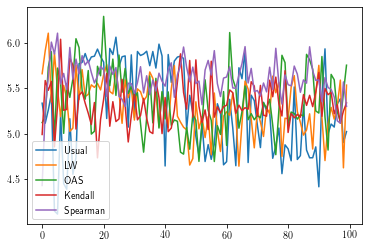

In [28]:
exercise_14(n, cov, og_eigvec, obs, methods, labels, 'fro')

### Infinity norm

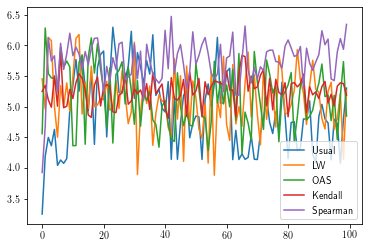

In [29]:
exercise_14(n, cov, og_eigvec, obs, methods, labels, np.inf)

### Norm 2

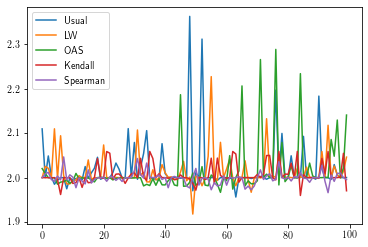

In [30]:
exercise_14(n, cov, og_eigvec, obs, methods, labels, 2)

### Norm 1

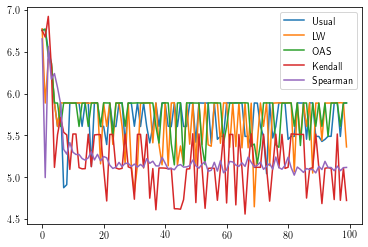

In [31]:
exercise_14(n, cov, og_eigvec, obs, methods, labels, 1)